# ME574 Homework 1 Due Thursday April 9

___Your "deliverable" to be turned in is a python file (with a `.py` extension) that you create by filling in the template file (`template_hw1.py`) that is posted on the Canvas site along with the homework assignment.___

Let's start with some python coding exercises. Be sure to in include docstrings when you define your functions!

1) Write a python function `dn_sin0(n)` to evaluate the $n^{th}$ derivate of $sin(0)$. This should provide a chance to use the `if-elif-else` control structure.

2) Write python code to compute the values of the function `taylor_sin(x,n)` that evaluates the Taylor series for $sin(x)$ with truncation error of order $h^n$; i.e. including $n$ terms of degree $0$ through $n-1$.

3) Make a plot showing the function $sin(x)$ and it's Taylor series expansions neglecting terms of order `n in range(2,16,2)`. Make sure your plot includes a legend that identifies the untruncated curve $sin(x)$ and and the truncation order for the other curves in the plot. (This will be the first of your exercises in searching for and interpreting documentation.)

4) Consider computing how well a truncated Taylor series approximates the function $sin(x)$ on a particular interval, One approach would be to compute an array of values of $sin(x)$ and an array of values for the truncated approximation at the same set of points. Then the problem becomes quantifying the difference between two arrays of the same shape. Note that, just like complex numbers (which can be considered as arrays of length 2), there is no natural ordering of arrays. So we need to get from the 2 arrays to a scalar value quantifying their difference.

a) Write a function that quanitifies the difference between 2 arrays of the same shape. There are multiple ways to do this, so search for information on functions like `abs`, `max`, `norm`, and `allclose`.

b) Use your function from 4a to determine the truncation order needed for your difference measure to be less than `1e-2` if you evaluate your functions at 50 points equally spaced across the interval $[0, \pi/4]$.

5) The "python_logistic_map" notebook looked at the case of a 1D iterated mapping. Now consider a classic iterated mapping in 2D. In complex form, the mapping is $f(z) = z^2 + c$ and the question of interest is the following: If you start at $z=0$, which values of $c$ cause the iterates to leave the vicinity of (i.e., get more than 2.5 units away from) the origin?

For this problem you should write python code to implement the real variable version of this problem. 

- Rewrite the map as a function of two real variables and write a python function that implements the map.

- Write a python function that computes the $n^{th}$ iterate starting from ${x,y}={0,0}$ with specified real and imaginary parts of the parameter $c_x \text{ and } c_y$.

- Compute a 2D boolean array specifying which constants caused the iteration to leave the vicinity of the origin within 256 iterations.

- Find an example of how to time python code execution. Include timing code, and print the time required to compute a 512 x 512 iteration count array.

- Create an image to display your results. (This should match up with the image included in the "python_logistic_map" notebook.)

- Modify your code to create an image that color codes the iteration number at which the point leaves the vicinity of the origin.

In [1]:
from hw1 import *

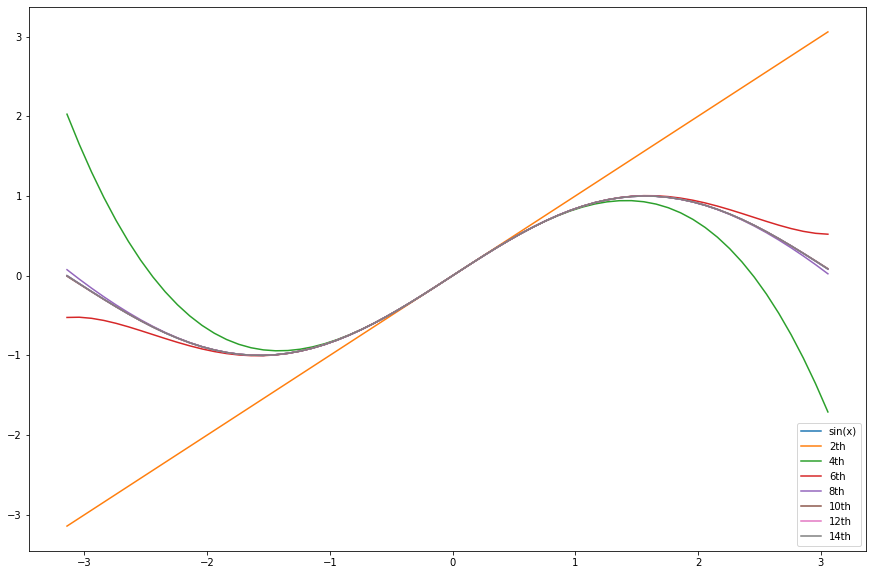

In [7]:
n_list = []
for i in  range(2,16,2):
    n_list.append(i)
            
x = np.arange(-np.pi,np.pi,0.1)   # start,stop,step
y = np.sin(x)
plt.figure(figsize=(15,10))
plt.plot(x,y, label="sin(x)")
            
for i in n_list:
    y = []
    for dx in x:
        y.append(taylor_sin(dx, i))
    y = np.array(y)
    plt.plot(x, y, label=str(i) + "th")
plt.legend(loc='best')
plt.show()

In [20]:
error_limit = 1e-2

n_list = []
for i in  range(2,16,2):
    n_list.append(i)

x = np.linspace(0, np.pi/4, 50)
y_true = np.sin(x)
# plt.figure(figsize=(15,10))
# plt.plot(x,y, label="sin(x)")
        
def find_n():
    n = 2
    while(True):
        y = []
        for dx in x:
            y.append(taylor_sin(dx, n))
        y = np.array(y)
        diff = measure_diff(y, y_true)
        if diff < error_limit:
            print(diff)
            break
        n += 2
    return n
n = find_n()
print(n)
#     plt.plot(x, y, label=str(i) + "th")
# plt.legend(loc='best')
# plt.show()

0.005482995660512878
4
